Análise e Otimização do Consumo de Energia Residencial por Ambiente



# 1. Introduzione

**Obiettivo:**  
Comprendere il consumo di elettricità domestica per ambiente e identificare schemi per ottimizzare l’uso e ridurre gli sprechi.

**Importanza:**  
L’energia rappresenta uno dei maggiori costi fissi. Una gestione efficiente porta risparmi economici e ambientali.

**Dati:**  
- Consumo giornaliero per ambiente (camere da letto, soggiorno, cucina, piscina)  
- Consumo totale (KW/H)  
- 211 giorni di registrazioni

---

# 2. Metodologia

- **Analisi Esplorativa:**  
    Studio dei dati di consumo per ambiente, identificando medie, variazioni e profili tipici.

- **Clustering:**  
    Raggruppamento delle abitazioni in cluster di consumo (basso, equilibrato, alto) per personalizzare le raccomandazioni.

- **Modellazione Predittiva:**  
    Costruzione di un modello di regressione lineare per prevedere il consumo totale a partire dal consumo individuale di ciascun ambiente.

- **Valutazione:**  
    Misurazione delle prestazioni del modello con le metriche MAE e R² per garantire previsioni affidabili.

- **Raccomandazioni:**  
    Suggerimenti pratici per ogni profilo in base ai cluster identificati.

---

# 3. Risultati e Analisi

**Clustering:**  
- Identificati 3 gruppi principali:  
    - **Basso consumo:** Uso controllato ed efficiente  
    - **Consumo equilibrato:** Uso medio con alcune aree ad alto consumo  
    - **Alto consumo:** Uso elevato, soprattutto in soggiorno, cucina o piscina

**Modello di Regressione Lineare:**  
- R² di **0,86** indica un’elevata capacità predittiva  
- Il **soggiorno** ha il maggiore impatto sul consumo totale

**Analisi Temporale:**  
- Identificati picchi e stagionalità per future azioni programmate

---

# 4. Conclusioni Data Science

- Permessa la segmentazione delle abitazioni e la previsione ad alta precisione del consumo
- Il modello è semplice, interpretabile e indica quali ambienti influenzano maggiormente il consumo totale
- L’analisi ha consentito la creazione di profili che facilitano raccomandazioni mirate

---

# 5. Impatto Aziendale e Raccomandazioni

- Piani personalizzati, sconti e incentivi per ridurre il consumo
- Suggerimenti: automazione, sensori di presenza, uso consapevole, tariffe differenziate
- L’approccio può ridurre i costi, aumentare la soddisfazione dei clienti e contribuire alla sostenibilità

---


In [43]:
import pandas as pd
import locale
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [44]:
# Carica il file Excel con più fogli
file_path = "Consumo_de_Energia_Analise.xlsx"
xls = pd.ExcelFile("/Users/fabicampanari/Desktop/Project Planet Smart City Laguna/Codes + Dataset/Consumo_de_Energia_Analise.xlsx")

# Elenca i nomi dei fogli
sheet_names = xls.sheet_names
sheet_names

['Sheet1']

In [45]:
# Carica i dati dal foglio "Sheet1"
df = xls.parse('Sheet1')

# Visualizza le prime righe per un'analisi iniziale
df

,Data,KW/H,Quarto1,Quarto2,Sala,Cozinha,Piscina
0,01/jan,1395,10,8,15,16,9
1,02/jan,1086,9,8,10,6,10
2,03/jan,1174,10,11,9,13,6
3,04/jan,1207,6,8,10,8,16
4,05/jan,1036,13,4,10,8,8
...,...,...,...,...,...,...,...
206,26/jul,1355,12,12,12,10,6
207,27/jul,1533,14,12,16,13,10
208,28/jul,967,4,9,8,8,9
209,29/jul,1416,14,10,13,8,10


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Data     211 non-null    object
 1   KW/H     211 non-null    int64 
 2   Quarto1  211 non-null    int64 
 3   Quarto2  211 non-null    int64 
 4   Sala     211 non-null    int64 
 5   Cozinha  211 non-null    int64 
 6   Piscina  211 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 11.7+ KB


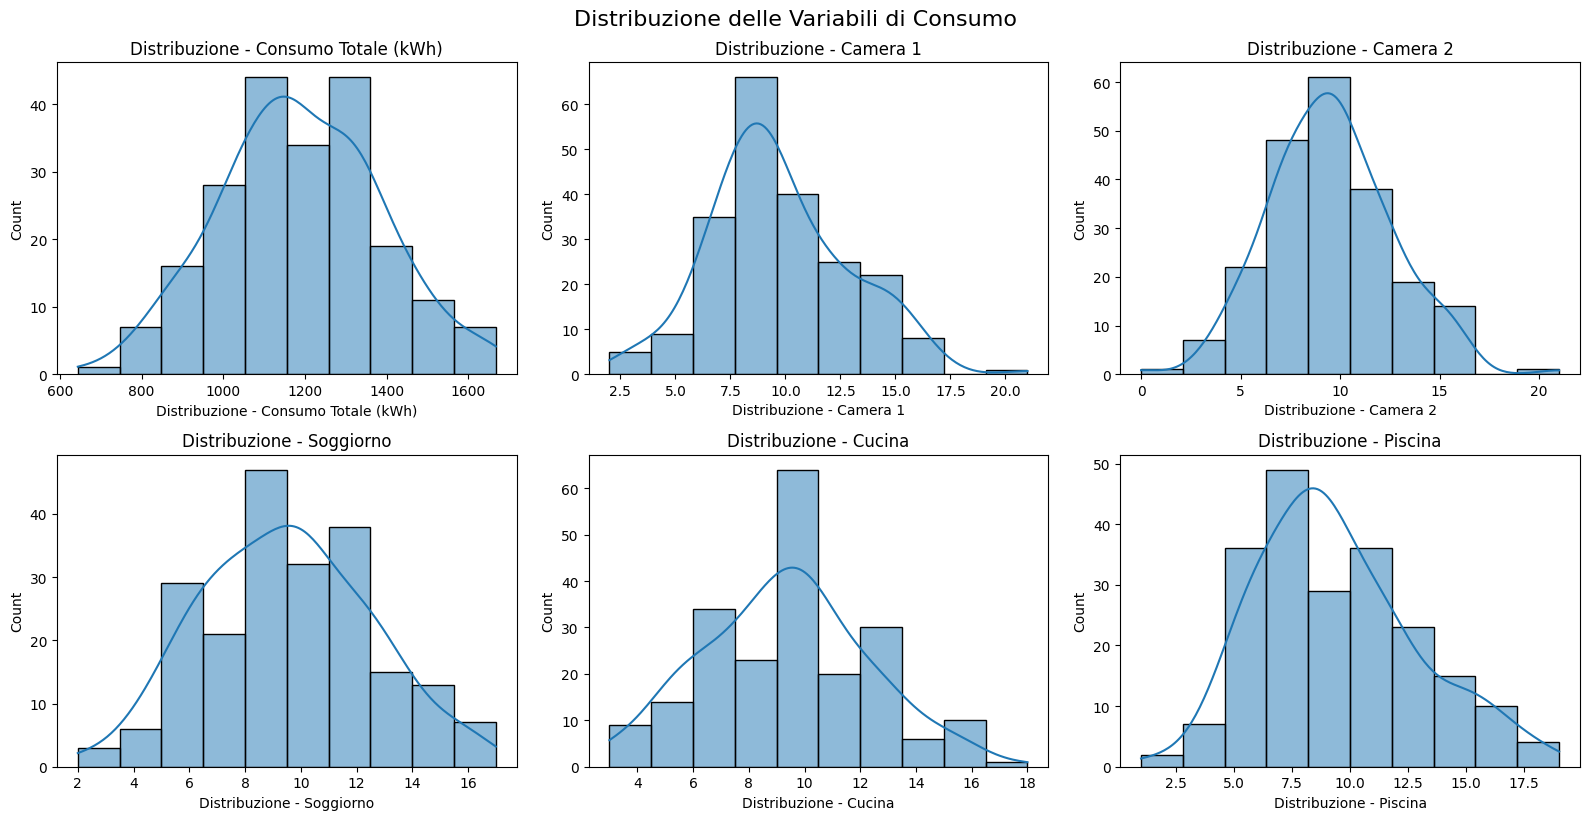

(              KW/H     Quarto1     Quarto2        Sala     Cozinha     Piscina
 count   211.000000  211.000000  211.000000  211.000000  211.000000  211.000000
 mean   1188.317536    9.687204    9.549763    9.445498    9.322275    9.383886
 std     197.439318    3.176817    3.073874    3.033247    2.969757    3.436433
 min     644.000000    2.000000    0.000000    2.000000    3.000000    1.000000
 25%    1057.000000    8.000000    7.000000    7.000000    7.000000    7.000000
 50%    1176.000000    9.000000    9.000000    9.000000    9.000000    9.000000
 75%    1324.000000   12.000000   11.500000   12.000000   11.000000   11.000000
 max    1667.000000   21.000000   21.000000   17.000000   18.000000   19.000000,
              KW/H   Quarto1   Quarto2      Sala   Cozinha   Piscina
 KW/H     1.000000  0.521439  0.418033  0.548475  0.409667  0.427213
 Quarto1  0.521439  1.000000  0.060606  0.169207  0.071809  0.064704
 Quarto2  0.418033  0.060606  1.000000  0.038469  0.049356  0.012383
 Sa

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estatistiche descrittive
summary = df.describe()

# Correlazione tra variabili
correlation = df.corr(numeric_only=True)

# Visualizzazione: istogramma delle variabili
cols_to_plot = df.columns[1:]  # Ignora la colonna 'Data'
n_cols = len(cols_to_plot)
n_rows = (n_cols + 2) // 3  # 3 colonne per riga

fig, axes = plt.subplots(nrows=n_rows, ncols=3, figsize=(16, 4 * n_rows))
axes = axes.flatten()

titoli = {
    'KW/H': 'Distribuzione - Consumo Totale (kWh)',
    'Quarto1': 'Distribuzione - Camera 1',
    'Quarto2': 'Distribuzione - Camera 2',
    'Sala': 'Distribuzione - Soggiorno',
    'Cozinha': 'Distribuzione - Cucina',
    'Piscina': 'Distribuzione - Piscina'
}

for i, col in enumerate(cols_to_plot):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=10)
    axes[i].set_title(titoli.get(col, f'Distribuzione - {col}'))
    axes[i].set_xlabel(titoli.get(col, col))

# Rimuovi assi non utilizzati, se presenti
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Distribuzione delle Variabili di Consumo", fontsize=16, y=1.02)
plt.show()

summary, correlation

# 📈 Riepilogo Statistico delle Variabili

**Consumo medio giornaliero:** 1188,3 kWh  
**Massimo:** 1667 kWh &nbsp;&nbsp;|&nbsp;&nbsp; **Minimo:** 644 kWh

---

## Ambienti Più Utilizzati

- **Camera 1:** media di 9,7 attivazioni/giorno
- **Cucina e Piscina:** ~9,3 attivazioni/giorno
- **Soggiorno:** maggiore variazione d’uso (fino a 17 attivazioni/giorno)

I dati sono ben distribuiti — senza grandi distorsioni o outlier evidenti.

---

## 📊 Correlazione con il Consumo Totale (KW/H)

- **Soggiorno:** maggiore correlazione con il consumo totale (**0,55**)
- **Camera 1:** 0,52
- **Piscina:** 0,43
- **Camera 2 e Cucina:** influenzano anch’essi, ma con peso minore
- **Cucina** ha correlazione negativa con la **Piscina** (-0,08), suggerendo uso alternato in alcuni giorni

---

## 🧠 Insight di Data Science & Business

- È possibile costruire un modello di regressione lineare per prevedere il consumo in base alle attivazioni per ambiente.
- Il clustering K-means può anche separare i giorni in gruppi di uso leggero, moderato e intenso — ottimo per allarmi personalizzati o ottimizzazione tariffaria.

Dal punto di vista ESG e Smart City, questi dati possono guidare:

- Campagne educative per ambiente (es: “Uso consapevole del soggiorno”)
- Automazione IoT (es: avvisi quando l’uso della piscina supera lo standard)

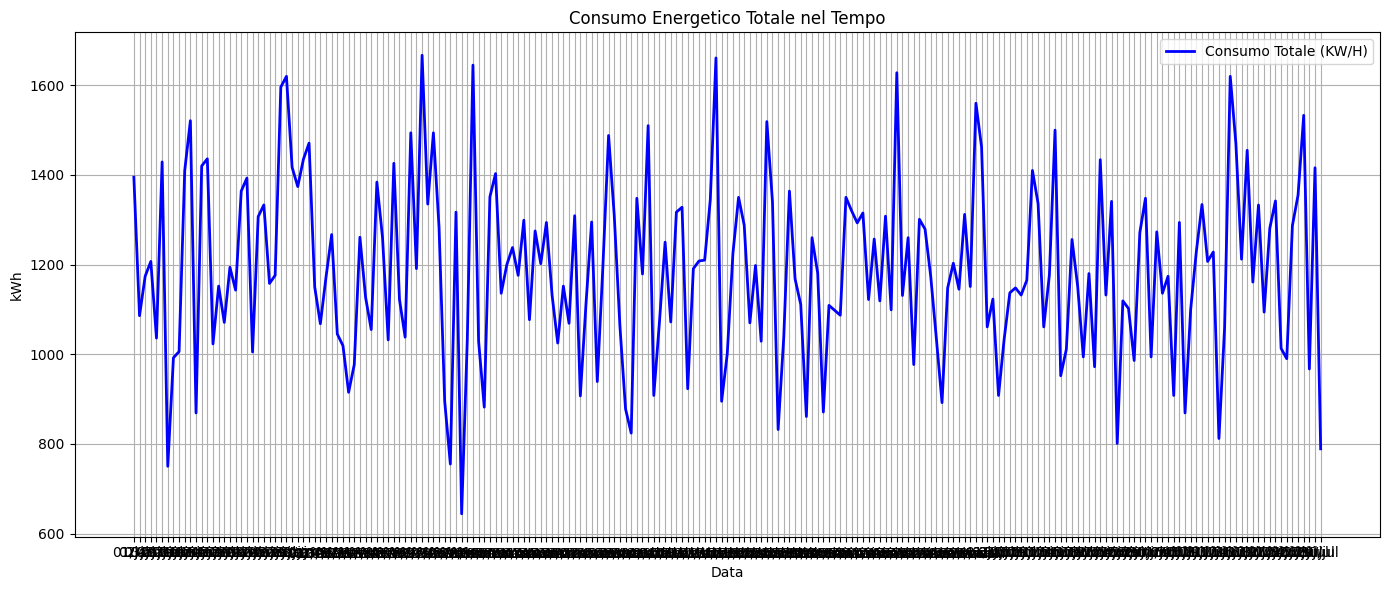

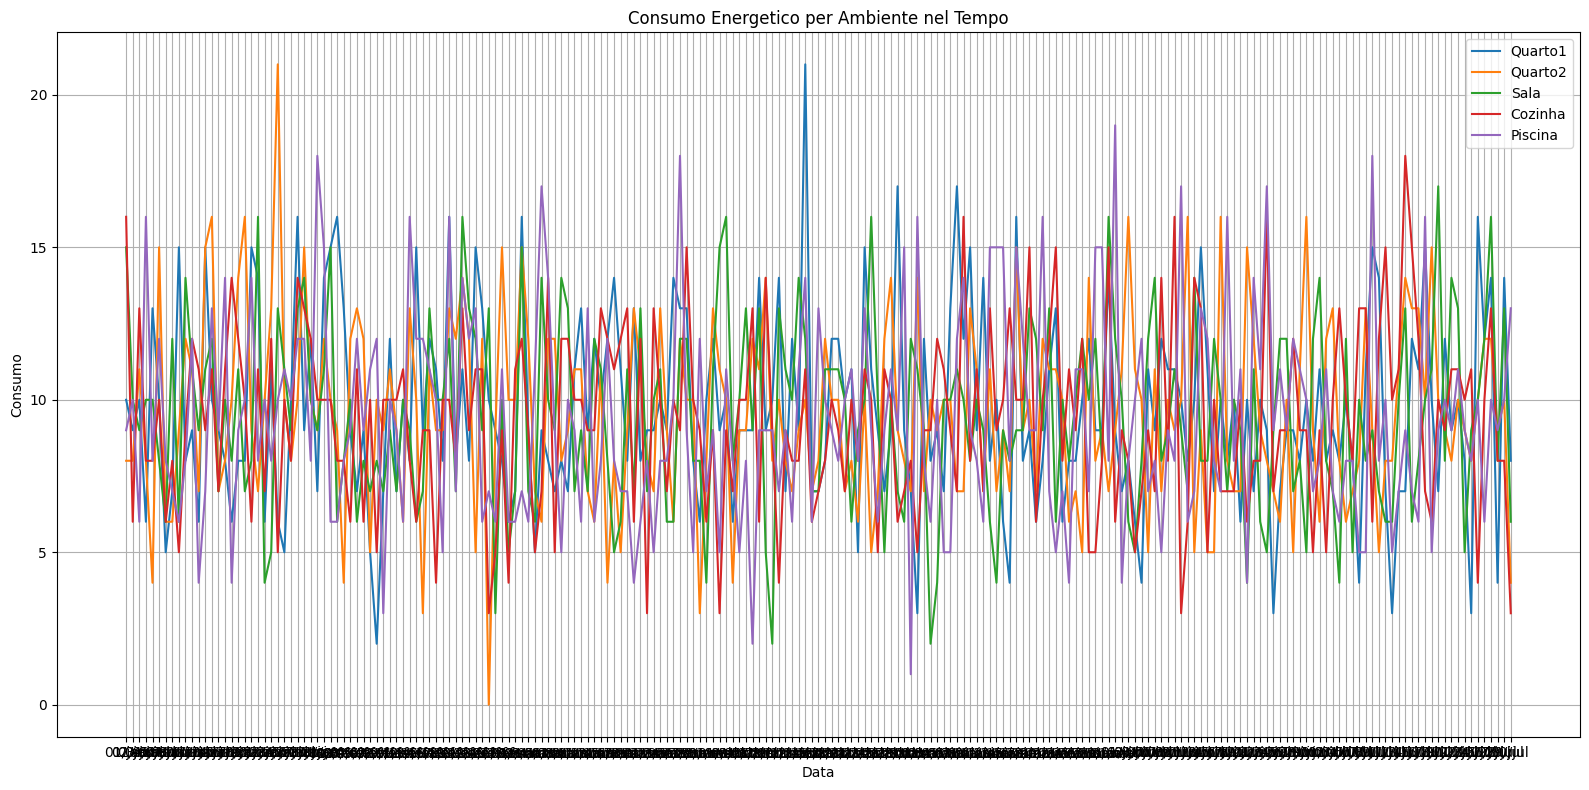

In [48]:
# Traduza títulos e legendas dos gráficos para italiano

# Consumo totale nel tempo
plt.figure(figsize=(14, 6))
plt.plot(df['Data'], df['KW/H'], label='Consumo Totale (KW/H)', color='blue', linewidth=2)
plt.title('Consumo Energetico Totale nel Tempo')
plt.xlabel('Data')
plt.ylabel('kWh')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Consumo per ambiente nel tempo
plt.figure(figsize=(16, 8))
for comodo in ['Quarto1', 'Quarto2', 'Sala', 'Cozinha', 'Piscina']:
    plt.plot(df['Data'], df[comodo], label=comodo)

plt.title('Consumo Energetico per Ambiente nel Tempo')
plt.xlabel('Data')
plt.ylabel('Consumo')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Coefficienti: [23.36409077 23.15884869 25.79029969 23.48572963 24.44823671]
Intercetta: 49.886394002345696
Errore Assoluto Medio (MAE): 57.743376101762394
R² (coefficiente di determinazione): 0.8638797274963957


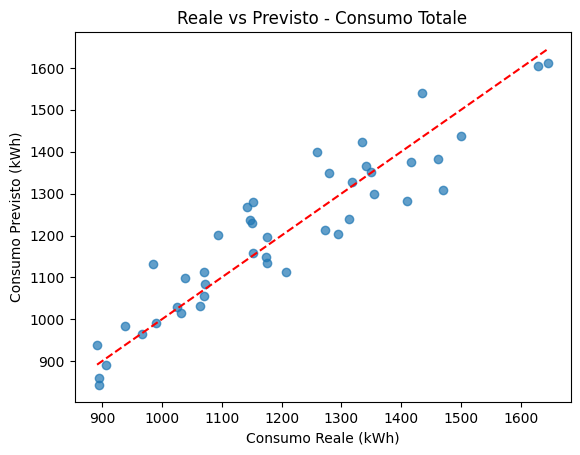

In [49]:
# Definisci le variabili predittive (X) e la variabile target (y)
X = df[['Quarto1', 'Quarto2', 'Sala', 'Cozinha', 'Piscina']]
y = df['KW/H']

# Suddividi in set di addestramento e di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regressione lineare
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predizione
y_pred = modelo.predict(X_test)

# Valutazione del modello
print("Coefficienti:", modelo.coef_)
print("Intercetta:", modelo.intercept_)
print("Errore Assoluto Medio (MAE):", mean_absolute_error(y_test, y_pred))
print("R² (coefficiente di determinazione):", r2_score(y_test, y_pred))

# Plot dei risultati con testi in italiano
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Consumo Reale (kWh)')
plt.ylabel('Consumo Previsto (kWh)')
plt.title('Reale vs Previsto - Consumo Totale')
plt.show()

## 📌 Risultati del Modello

---

### ✅ **Coefficienti del Modello Lineare**

| Ambiente        | Coefficiente (kWh per attivazione) | Impatto                |
|-----------------|:----------------------------------:|------------------------|
| **Soggiorno**   | **+25,79**                         | Impatto maggiore       |
| Piscina         | +24,45                             |                        |
| Cucina          | +23,49                             |                        |
| Camera 1        | +23,30                             |                        |
| Camera 2        | +23,10                             |                        |

> Ogni attivazione in un ambiente aumenta il consumo stimato di circa **23-26 kWh**, con il soggiorno come fattore principale.

---

### 🎯 **Intercetta**

- **49,88 kWh**  
    _Consumo base stimato anche con zero attivazioni — può riflettere consumi continui (frigoriferi, standby, ecc.)_

---

### 📉 **Errore Assoluto Medio (MAE)**

- **57,74 kWh**  
    _Basso rispetto alla media totale (~1188 kWh), indice di buona accuratezza._

---

### 📈 **R² (Coefficiente di Determinazione)**

- **0,86**  
    _Il modello spiega l’86% della variazione del consumo, un valore molto buono per applicazioni pratiche._

---


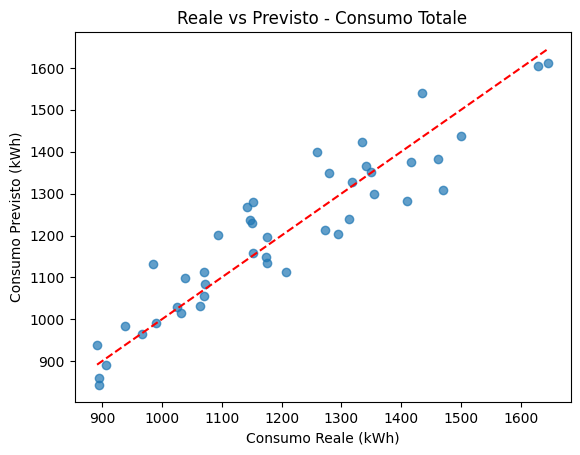

In [50]:
# Tradotto in italiano:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Linea identità
plt.xlabel('Consumo Reale (kWh)')
plt.ylabel('Consumo Previsto (kWh)')
plt.title('Reale vs Previsto - Consumo Totale')
plt.show()

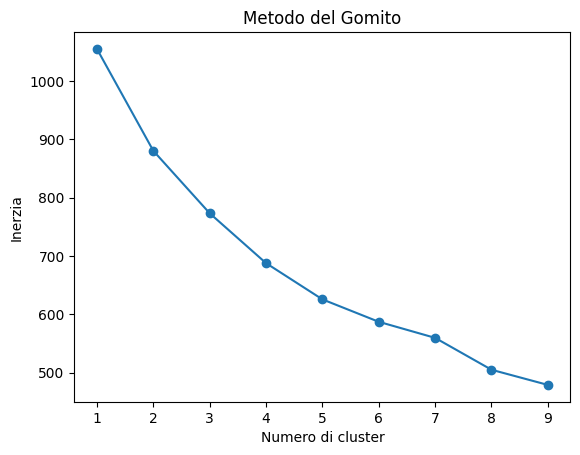

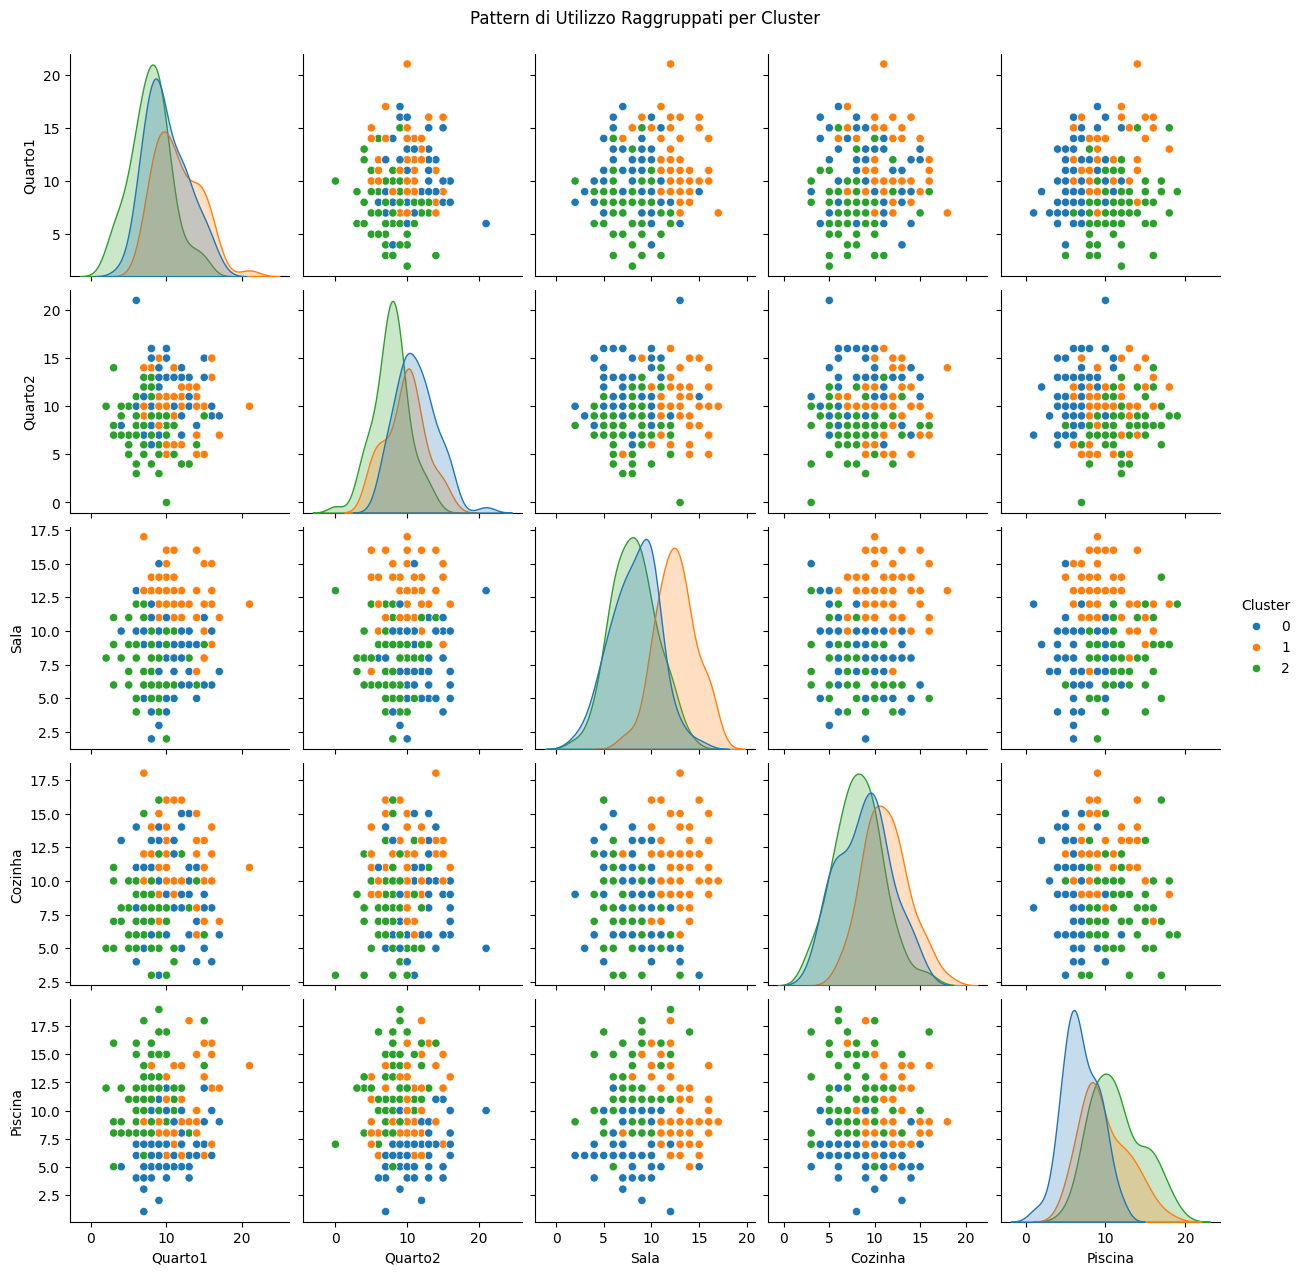

In [51]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Os dados X e X_scaled já estão definidos

# Método do cotovelo (Elbow) com textos em italiano
inertia = []
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title('Metodo del Gomito')
plt.xlabel('Numero di cluster')
plt.ylabel('Inerzia')
plt.show()

# KMeans com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualização dos clusters com textos em italiano
sns.pairplot(
    df,
    hue='Cluster',
    vars=['Quarto1', 'Quarto2', 'Sala', 'Cozinha', 'Piscina'],
    palette='tab10'
)
plt.suptitle("Pattern di Utilizzo Raggruppati per Cluster", y=1.02)
plt.show()

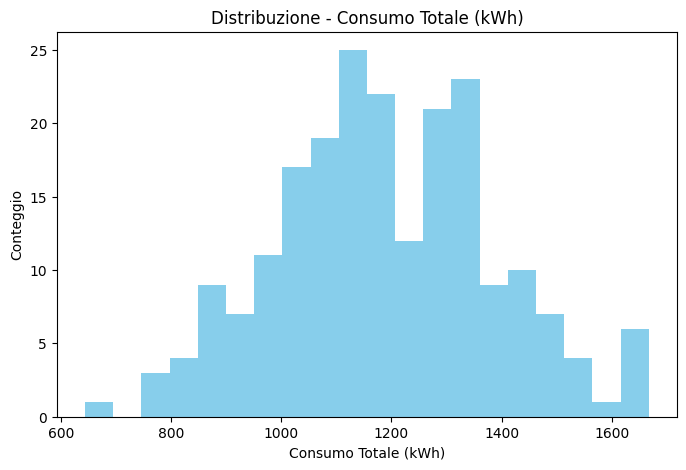

In [52]:
import matplotlib.pyplot as plt

# Exemplo de plot com textos em italiano
plt.figure(figsize=(8, 5))
plt.hist(df['KW/H'], bins=20, color='skyblue')
plt.title('Distribuzione - Consumo Totale (kWh)')
plt.xlabel('Consumo Totale (kWh)')
plt.ylabel('Conteggio')
plt.show()


In [53]:
recomendacoes = {
    '🔵 Baixo Consumo': [
        "✅ Mantieni le buone pratiche già adottate.",
        "🎁 Offri ricompense o sconti (gamification).",
        "🔋 Incentiva l'uso di energia solare / microgenerazione."
    ],
    '🟡 Consumo Equilibrado': [
        "🔌 Automatizza lo spegnimento degli apparecchi in orari fissi.",
        "🕵️ Installa sensori di presenza nelle camere e nel soggiorno.",
        "📊 Invia report settimanali di utilizzo comparativo."
    ],
    '🟠 Consumo Elevado': [
        "🛏️ Automatizza luci ed elettronica nelle stanze con consumo elevato.",
        "🕵️ Installa sensori di presenza specifici per le stanze.",
        "📊 Monitora l'uso per identificare picchi non necessari."
    ],
    '🔴 Alto Consumo (Sala/Piscina)': [
        "💧 Programma il funzionamento della pompa della piscina fuori dagli orari di punta.",
        "💡 Incentiva l'uso consapevole dell'illuminazione e degli apparecchi elettronici.",
        "🧠 Suggerisci automazione e adesione alla tariffa bianca."
    ],
    '🔴 Alto Consumo (Cozinha)': [
        "🍳 Verifica gli apparecchi da cucina per consumo eccessivo.",
        "⏰ Controlla gli orari di utilizzo di forno e frigorifero.",
        "💡 Incentiva l'uso efficiente dell'illuminazione."
    ]
}


# Rapporto sui Profili di Consumo per Cluster

---

## === Cluster 0 - 🟡 Consumo Equilibrato ===

### 📊 Profilo Medio:
| Ambiente     | Consumo Medio (kWh)     |
|--------------|:----------------------:|
| Camera 1     | 10,00                  |
| Camera 2     | 11,19                  |
| Soggiorno    | 8,25                   |
| Cucina       | 8,89                   |
| Piscina      | 6,93                   |
| **Totale (KW/H)** | **1129,99**        |

### 💡 Raccomandazioni:
- 🔌 Automatizzare lo spegnimento degli apparecchi a orari fissi.
- 🕵️ Installare sensori di presenza in camere e soggiorno.
- 📊 Inviare report settimanali di utilizzo comparativo.

---

## === Cluster 1 - 🟠 Consumo Elevato in Soggiorno, Cucina ===

### 📊 Profilo Medio:
| Ambiente     | Consumo Medio (kWh)     |
|--------------|:----------------------:|
| Camera 1     | 11,46                  |
| Camera 2     | 9,74                   |
| Soggiorno    | 12,51                  |
| Cucina       | 11,23                  |
| Piscina      | 9,89                   |
| **Totale (KW/H)** | **1368,13**        |

### 💡 Raccomandazioni:
- 🛏️ Automatizzare luci ed elettronica nei locali a maggior consumo.
- 🕵️ Installare sensori di presenza specifici per questi ambienti.
- 📊 Monitorare l’uso per identificare picchi non necessari.

---

## === Cluster 2 - 🟠 Consumo Elevato in Piscina ===

### 📊 Profilo Medio:
| Ambiente     | Consumo Medio (kWh)     |
|--------------|:----------------------:|
| Camera 1     | 7,93                   |
| Camera 2     | 7,76                   |
| Soggiorno    | 8,15                   |
| Cucina       | 8,20                   |
| Piscina      | 11,43                  |
| **Totale (KW/H)** | **1100,40**        |

### 💡 Raccomandazioni:
- 💧 Monitorare l’uso della piscina e della pompa.
- ⏰ Programmare orari di funzionamento efficienti.
- 💡 Incentivare l’uso consapevole dell’illuminazione esterna.

---

*Fine del rapporto.*
